In [1]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/kuznetsovnikita/recommendations/src/data')

from get_users_info import *
from get_brand_category_info import *
from get_preference_matrix import *

In [2]:
# матрица предпочтений
pref_matrix = get_pref_matrix(to_csv=False)

/var/folders/k_/q2nqvc5s4b9g7bf4ljty8wd00000gn/T/ipykernel_54323/885499441.py:2: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  pref_matrix = get_pref_matrix(to_csv=False)
/Users/kuznetsovnikita/recommendations/src/data/get_preference_matrix.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['ym_client_id'] = products['ym_client_id'].astype(str)


In [23]:
item_user = pref_matrix.drop(columns=['id_s','item_total'], index = ['user_total'])

In [24]:
item_corrs = np.corrcoef(item_user)

In [26]:
item_corrs_df = pd.DataFrame(item_corrs, index=item_user.index, columns=item_user.index)
item_corrs_df

,"(1017 ALYX 9SM, Футболки и лонгсливы)","(10sei0otto, Джемперы и свитеры)","(11 By Boris Bidjan Saberi, Футболки и лонгсливы)","(11 By Boris Bidjan Saberi, Штаны и брюки)","(424 On Fairfax, Куртки и пуховики)","(99%Is, Штаны и брюки)","(A Cold Wall, Пальто и плащи)","(A Cold Wall, Футболки и лонгсливы)","(A.P.C., Деним)","(A1923, Ботинки и сапоги)",...,"(Ys (Yamamoto), Пиджаки и жилеты)","(Ys (Yamamoto), Рубашки)","(Ys (Yamamoto), Футболки и лонгсливы)","(Ys (Yamamoto), Штаны и брюки)","(Yves Saint Laurent, Галстуки, запонки, носки)","(Yves Saint Laurent, Куртки и пуховики)","(Zegna Couture, Футболки и лонгсливы)","(Ziggy Chen, Штаны и брюки)","(kaval, Штаны и брюки)","(ВЛАД ВЫСОЦКИЙ, Украшения и другое)"
"(1017 ALYX 9SM, Футболки и лонгсливы)",1.000000,-0.000132,-0.000426,0.003863,-0.000208,-0.000465,0.017268,0.270277,0.011872,-0.000402,...,-0.000648,0.043212,-0.000365,-0.000497,-0.000412,-0.000825,-0.000132,-0.000535,-0.000339,0.005634
"(10sei0otto, Джемперы и свитеры)",-0.000132,1.000000,-0.000094,-0.000108,-0.000046,-0.000103,-0.000336,-0.000228,-0.000091,-0.000089,...,-0.000143,-0.000132,-0.000081,-0.000110,-0.000091,-0.000182,-0.000029,-0.000118,-0.000075,-0.000404
"(11 By Boris Bidjan Saberi, Футболки и лонгсливы)",-0.000426,-0.000094,1.000000,0.012087,0.102170,-0.000332,0.023961,-0.000737,-0.000296,-0.000287,...,0.009187,0.010002,-0.000261,0.009332,-0.000294,-0.000589,-0.000094,0.088735,-0.000242,0.020017
"(11 By Boris Bidjan Saberi, Штаны и брюки)",0.003863,-0.000108,0.012087,1.000000,-0.000171,0.014698,0.031908,0.036820,-0.000341,-0.000331,...,0.037301,-0.000493,0.026356,0.003044,-0.000339,0.051250,-0.000108,-0.000440,-0.000279,0.009894
"(424 On Fairfax, Куртки и пуховики)",-0.000208,-0.000046,0.102170,-0.000171,1.000000,-0.000162,0.009961,-0.000360,-0.000145,-0.000140,...,-0.000226,-0.000209,-0.000127,-0.000173,-0.000144,-0.000288,-0.000046,0.021589,-0.000118,-0.000639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Yves Saint Laurent, Куртки и пуховики)",-0.000825,-0.000182,-0.000589,0.051250,-0.000288,-0.000643,0.006612,0.016958,-0.000573,-0.000556,...,0.002461,-0.000828,-0.000505,0.019536,-0.000570,1.000000,-0.000182,-0.000740,-0.000468,0.019726
"(Zegna Couture, Футболки и лонгсливы)",-0.000132,-0.000029,-0.000094,-0.000108,-0.000046,-0.000103,-0.000336,-0.000228,-0.000091,-0.000089,...,-0.000143,-0.000132,-0.000081,-0.000110,-0.000091,-0.000182,1.000000,-0.000118,-0.000075,0.065505
"(Ziggy Chen, Штаны и брюки)",-0.000535,-0.000118,0.088735,-0.000440,0.021589,0.013090,0.003206,0.002823,-0.000371,-0.000361,...,0.128803,0.012781,-0.000327,-0.000445,-0.000370,-0.000740,-0.000118,1.000000,0.066099,0.000627
"(kaval, Штаны и брюки)",-0.000339,-0.000075,-0.000242,-0.000279,-0.000118,-0.000264,0.016201,0.020414,0.027661,-0.000228,...,0.333258,0.049395,-0.000207,0.022816,-0.000234,-0.000468,-0.000075,0.066099,1.000000,-0.001039


In [4]:
user_item = pref_matrix.drop(columns=['id_s','item_total'], index = ['user_total']).T
user_item

,"(1017 ALYX 9SM, Футболки и лонгсливы)","(10sei0otto, Джемперы и свитеры)","(11 By Boris Bidjan Saberi, Футболки и лонгсливы)","(11 By Boris Bidjan Saberi, Штаны и брюки)","(424 On Fairfax, Куртки и пуховики)","(99%Is, Штаны и брюки)","(A Cold Wall, Пальто и плащи)","(A Cold Wall, Футболки и лонгсливы)","(A.P.C., Деним)","(A1923, Ботинки и сапоги)",...,"(Ys (Yamamoto), Пиджаки и жилеты)","(Ys (Yamamoto), Рубашки)","(Ys (Yamamoto), Футболки и лонгсливы)","(Ys (Yamamoto), Штаны и брюки)","(Yves Saint Laurent, Галстуки, запонки, носки)","(Yves Saint Laurent, Куртки и пуховики)","(Zegna Couture, Футболки и лонгсливы)","(Ziggy Chen, Штаны и брюки)","(kaval, Штаны и брюки)","(ВЛАД ВЫСОЦКИЙ, Украшения и другое)"
1586517765142996502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586839436824718143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586861088574635654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586877094630823534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1587480513689496288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640668414990247385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640817089200208316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642171750651415285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642196883929739524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
user1 = user_item.loc['1586517765142996502']
user2 = user_item.loc['1587480513689496288']
np.corrcoef(user1, user2)[0][1]

-0.005406218054745005

In [149]:
corrs

array([[ 1.        , -0.00884118, -0.00765223, ..., -0.00765223,
                nan,  0.02320118],
       [-0.00884118,  1.        , -0.00403977, ..., -0.00403977,
                nan, -0.01372663],
       [-0.00765223, -0.00403977,  1.        , ..., -0.0034965 ,
                nan, -0.01188068],
       ...,
       [-0.00765223, -0.00403977, -0.0034965 , ...,  1.        ,
                nan, -0.01188068],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.02320118, -0.01372663, -0.01188068, ..., -0.01188068,
                nan,  1.        ]])

In [15]:
corrs = np.corrcoef(user_item)


In [150]:
corrs_df = pd.DataFrame(corrs)

In [151]:
corrs_df

,0,1,2,3,4,5,6,7,8,9,...,34400,34401,34402,34403,34404,34405,34406,34407,34408,34409
0,1.000000,-0.008841,-0.007652,-0.008159,-0.005406,NaN,0.084935,0.054270,-0.016080,NaN,...,-0.005406,-0.005406,-0.005406,NaN,NaN,0.054270,-0.005406,-0.007652,NaN,0.023201
1,-0.008841,1.000000,-0.004040,-0.004307,-0.002854,NaN,-0.009070,-0.002854,-0.008489,NaN,...,-0.002854,-0.002854,-0.002854,NaN,NaN,-0.002854,-0.002854,-0.004040,NaN,-0.013727
2,-0.007652,-0.004040,1.000000,-0.003728,-0.002470,NaN,-0.007850,-0.002470,-0.007347,NaN,...,-0.002470,-0.002470,-0.002470,NaN,NaN,-0.002470,-0.002470,-0.003497,NaN,-0.011881
3,-0.008159,-0.004307,-0.003728,1.000000,-0.002634,NaN,0.213376,-0.002634,-0.007834,NaN,...,-0.002634,-0.002634,-0.002634,NaN,NaN,-0.002634,-0.002634,-0.003728,NaN,0.111984
4,-0.005406,-0.002854,-0.002470,-0.002634,1.000000,NaN,-0.005546,-0.001745,-0.005191,NaN,...,-0.001745,-0.001745,-0.001745,NaN,NaN,-0.001745,-0.001745,-0.002470,NaN,-0.008394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34405,0.054270,-0.002854,-0.002470,-0.002634,-0.001745,NaN,-0.005546,-0.001745,-0.005191,NaN,...,-0.001745,-0.001745,-0.001745,NaN,NaN,1.000000,-0.001745,-0.002470,NaN,-0.008394
34406,-0.005406,-0.002854,-0.002470,-0.002634,-0.001745,NaN,-0.005546,-0.001745,-0.005191,NaN,...,-0.001745,-0.001745,-0.001745,NaN,NaN,-0.001745,1.000000,-0.002470,NaN,-0.008394
34407,-0.007652,-0.004040,-0.003497,-0.003728,-0.002470,NaN,-0.007850,-0.002470,-0.007347,NaN,...,-0.002470,-0.002470,-0.002470,NaN,NaN,-0.002470,-0.002470,1.000000,NaN,-0.011881
34408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
corrs_df[1].isna().sum() == corrs_df.shape[0]

False

In [112]:
recommended = {}
for user in user_item.index:
    recommended[user] = {}

rec_items = 10
similar_users = 60

for user in recommended:
    
    # тут отбираем для рек пользователя n похожих на него
    similar_users = corrs_df.loc[user].drop(user).nlargest(sim_users)

    # берем что смотрели похожие челы и складываем предпочтения
    similar_prefs = user_item.loc[similar_users.index]
    similar_prefs.loc['item_sum'] = similar_prefs.sum(axis = 0)

    # берем самые предпочтительные категории
    top_items = similar_prefs.T.sort_values('item_sum', ascending = False)
    
    # тут оставляю только те бренды-категории, в которых не отметился юзер, для которого рекомендуем
#     outer_recs = top_items.loc[
#         ~top_items.index.isin(item_user.loc[item_user[user] > 0].index)]['item_sum'].head(rec_items).to_dict()

    # тут оставляем, только при рекомендации конкретных штрихкодов, надо будет выкинуть те, где чел смотрел
    all_recs = top_items['item_sum'].head(rec_items).to_dict()
    
    recommended[user] = all_recs
#     break

In [113]:
recommended

{'1586517765142996502': {('Dolce & Gabbana', 'Куртки и пуховики'): 83.0,
  ('Stone Island', 'Свитшоты и худи'): 11.0,
  ('Giorgio Brato', 'Куртки и пуховики'): 1.0,
  ('Visvim', 'Свитшоты и худи'): 1.0,
  ('Ralph Lauren', 'Куртки и пуховики'): 1.0,
  ('Prada', 'Головные уборы'): 0.0,
  ('Paul Harnden Shoemakers', 'Пиджаки и жилеты'): 0.0,
  ('Paul Harnden Shoemakers', 'Рубашки'): 0.0,
  ('Pierre Balmain', 'Пальто и плащи'): 0.0,
  ('Pierre Balmain', 'Футболки и лонгсливы'): 0.0},
 '1586839436824718143': {('Archvio J.M. Ribot', 'Пиджаки и жилеты'): 69.0,
  ('Paul Harnden Shoemakers', 'Пиджаки и жилеты'): 66.0,
  ('Greg Lauren', 'Штаны и брюки'): 4.0,
  ('Paul Harnden Shoemakers', 'Рубашки'): 3.0,
  ('Saint Laurent Paris', 'Ремни'): 3.0,
  ('Maison Margiela', 'Пиджаки и жилеты'): 2.0,
  ('Boris Bidjan Saberi', 'Туфли'): 2.0,
  ('Vivienne Westwood', 'Пиджаки и жилеты'): 2.0,
  ('Carol Christian Poell', 'Рубашки'): 2.0,
  ('Isaac Sellam Experience', 'Кожаные куртки'): 2.0},
 '1586861088574

In [123]:
# проверяю заполненность предложенных
filling_by_user = {}

for user, recs in recommended.items():
    filling_by_user[user] = 0
    for rec, value in recs.items():
        if value > 0:
            filling_by_user[user] += 1/len(recs)
    filling_by_user[user] = round(filling_by_user[user],1)

<AxesSubplot:ylabel='Frequency'>

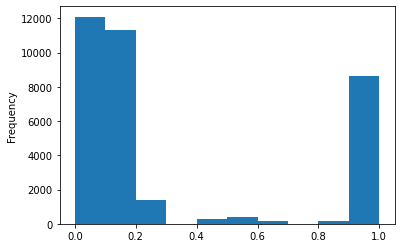

In [145]:
# распределение процентов заполненности
pd.Series(filling_by_user).plot(kind = 'hist', bins = 10)

In [164]:
# сколько людей с абсолютно никакими сходствами
null_rows = 0
for row in corrs_df:
    if corrs_df[row].isna().sum() == corrs_df.shape[0]:
        null_rows += 1
null_rows

12094